In [46]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import glob
import ntpath
import networkx as nx
import os
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)



In [2]:
csv_file = '/media/rna/yahoo_crawl_data/Yahoo-20190406T235503Z-001/Yahoo/URLtoHTML_yahoo_news.csv'

In [3]:
mapping_file_df = pd.read_csv(csv_file).\
                sort_values(by=['filename', 'URL']).\
                reset_index(drop=True)
mapping_file_df.head()


,filename,URL
0,00090e25-3aeb-4e0e-abfa-00ea58a6a48d.html,https://www.yahoo.com/news/harry-s-truman-cour...
1,00193717-117b-45b6-84dc-2e88026d41ca.html,https://www.yahoo.com/news/clinton-has-the-map...
2,00272c51-112a-455e-81e4-45b033b05475.html,https://www.yahoo.com/news/definitive-ranking-...
3,003247be-6972-419b-8b05-8d53a013db55.html,https://www.yahoo.com/news/george-h-w-bush-sli...
4,003ccc65-6f50-4219-a98d-3515db0986df.html,https://www.yahoo.com/news/lebron-james-hillar...


In [36]:
str(mapping_file_df[mapping_file_df.filename=='dc71c738-9dfb-4781-bc1b-f4c382eee5b5.html'].URL.iloc[0])

'https://www.yahoo.com/news/anti-maduro-protests-continue-venezuela-slideshow-wp-132714046/photo-p-venezuela-opposition-leader-governor-photo-132714450.html'

In [4]:
html_file = '/media/rna/yahoo_crawl_data/Yahoo-20190406T235503Z-001/Yahoo/yahoo/007aadfd-e47a-4098-b1d3-becbba5ab7d3.html'
crawl_data_dir = '/media/rna/yahoo_crawl_data/Yahoo-20190406T235503Z-001/Yahoo/yahoo/'
list_of_html_files = glob.glob('{}/*.html'.format(crawl_data_dir))

In [5]:
def get_outgoing_links(html_file):
    """Get list of outgoing links for the input html file.
    
    Parameters
    ----------
    html_file: str
               Path to html file
    
    Returns
    -------
    list_of_urls: list
                  List of outgoing urls
    
    """
    
    soup = BeautifulSoup(open(html_file).read().encode('utf-8'))
    links = []
    for link in soup.findAll('a', href=True):#attrs=['href']: re.compile("^https://")}):    
        # Skip internal linkes
        try:
            href = link.get('href')
        except IndexError:
            continue
        
        if href == '#':        
            continue
        try: 
            text = link.contents[0]
        except IndexError:
            #text = ''
            pass
        links.append(link.get('href'))
    return links

def get_filenames_for_URLs(mapping_file_df, list_of_links):
    """Get list of html filenames for a list of links
    
    Parameters
    ----------
    mapping_file_df: pd.DataFrame
                     Dataframe with mapping.csv loaded
    list_of_links: list
                   List of URLs
                   
    Returns
    -------
    list_of_filenames: list
                       List of filenames
    """
    
    return mapping_file_df[mapping_file_df.URL.isin(links)].filename.tolist()
        

In [6]:
links = get_outgoing_links(list_of_html_files[0])

In [7]:
get_filenames_for_URLs(mapping_file, links)

NameError: name 'mapping_file' is not defined

In [ ]:
# create empty matrix
connection_matrix = pd.DataFrame(columns=mapping_file.filename.tolist(), index=mapping_file.filename)

In [ ]:
connection_matrix.shape

In [ ]:
connection_matrix = connection_matrix.fillna(0)

In [ ]:
connection_matrix.head()

In [9]:
with open('edgelist.txt', 'w') as fh:
    for filepath in list_of_html_files:
        filename = path_leaf(filepath)
        links = get_outgoing_links(filepath)
        filenames_for_url = get_filenames_for_URLs(mapping_file_df, links)
        #connection_matrix.loc[filename, filenames_for_url]+=1
        #connection_matrix.loc[filename, filenames_for_url] =1
        #with open()    
        fh.write('{} {}\n'.format(filename, ' '.join(filenames_for_url)))
    

In [ ]:
# row is from column is to

In [ ]:
filename

In [ ]:
filenames_for_url

In [ ]:
connection_matrix.sum(axis=1)

In [ ]:
connection_matrix.sum(axis=0)

In [12]:
graph = nx.read_adjlist('./edgelist.txt', create_using=nx.DiGraph())

In [ ]:
graph = nx.from_numpy_matrix(connection_matrix.values)

In [ ]:
graph = nx.relabel_nodes(graph, dict(enumerate(connection_matrix.columns))) 

In [ ]:
G = nx.read_edgelist("edgeList.txt", create_using=nx.DiGraph(

In [13]:
pagerank = nx.pagerank(graph, 
                       alpha=0.85, 
                       personalization=None, 
                       max_iter=100, 
                       tol=1e-06, 
                       nstart=None, 
                       weight='weight', 
                       dangling=None)

In [16]:
with open('pagerank.txt', 'w') as fh:
    for key, value  in pagerank.items():
        fh.write('{}/{}={}\n'.format(crawl_data_dir, key, value))

# Query 

In [19]:
import solr

# create a connection to a solr server
s = solr.SolrConnection('http://nucleus.usc.edu:8983/solr/myexample')


In [30]:
response =s.query('Patriot Movement')#sort='pageRankFile desc')

In [42]:
response.next_batch()


In [44]:
hit['title']

['Right-wing Patriot Prayer rally and counterprotest in Portland, Ore.']

In [31]:
for hit in response.results:
    print(hit['title'])


['The worst reason of all to own a gun']
['Talk grows of replacing Trump at GOP convention']
['NFL Winners and Losers from free agency']
['In the age of Trump, can Democrats turn Orange County blue? Their first target is Darrell Issa']
['Down Ticket #11: Balance of Senate could hinge on Wisconsin rematch']
['As unions awaken, Sherrod Brown hopes to benefit']
['Unconventional #17: Trump meets the man who could become his running mate [Video]']
['Unconventional #23: Is Sanders really going to ‘fight’ Clinton in Philly? Does Scott Walker want to replace Trump in Cleveland? (and more!) [Video]']
['How the town of Whitefish defeated its neo-Nazi trolls — and became a national model of resistance']
['Right-wing Patriot Prayer rally and counterprotest in Portland, Ore.']


# Overlap

In [59]:
search_results_dir = '/media/dna/github/hatex/2019_Spring/CSCI-572/HW04/search_results'

query_terms = ['Venezuela', 'Senate', 'Democrats',
               'Republicans', 'Patriot Movement', 'Oscar 2019',
              'Channel', 'Wall']
data = []
for query in query_terms:
    df_solr = pd.read_csv(os.path.join(search_results_dir, '{}.solr.tsv'.format(query)))
    df_pagerank = pd.read_csv(os.path.join(search_results_dir, '{}.pageRank.tsv'.format(query)))
    overlap = len(set(df_solr.URL).intersection(df_pagerank.URL))
    data.append({'query': query, 'overlap': overlap})
    print(query, overlap)

Venezuela 3
Senate 0
Democrats 0
Republicans 0
Patriot Movement 1
Oscar 2019 0
Channel 0
Wall 0


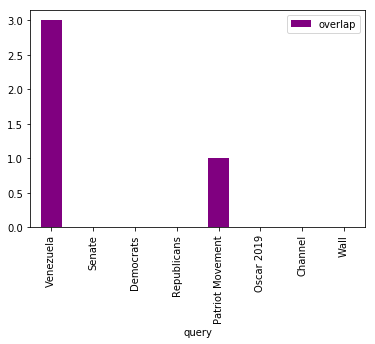

In [60]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
df.plot(kind='bar', x='query', y='overlap', color='purple')
plt.savefig('overlap_barplot.png')